In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix

In [4]:
RedWine_df=pd.read_csv("winequality-red.csv", sep=';')
RedWine_df["Type"]="Red Wine"
WhiteWine_df=pd.read_csv("winequality-white.csv", sep=';')
WhiteWine_df["Type"]="White wine"
wine_df=pd.concat([RedWine_df,WhiteWine_df],ignore_index=True)

In [5]:
wine_df.shape

(6497, 13)

In [6]:
wine_df["Type"].value_counts()

Type
White wine    4898
Red Wine      1599
Name: count, dtype: int64

In [7]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

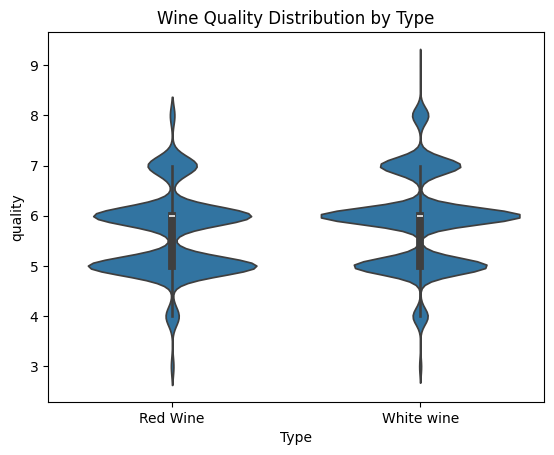

In [8]:
sns.violinplot(x='Type', y='quality', data=wine_df)
plt.title('Wine Quality Distribution by Type')
plt.show()

In [9]:
titanic_df = sns.load_dataset('titanic')

In [10]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
titanic_df['gender'] =titanic_df['sex'].map({'male': 1, 'female': 0})
titanic_df = titanic_df[["gender","age","pclass","survived"]]
titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].mean())
titanic_df.isna().sum()

gender      0
age         0
pclass      0
survived    0
dtype: int64

In [15]:
#using GridSearchCV implementing DecisonTreeClassifier for titanic dataset
x=titanic_df.drop(columns='survived',axis=1)
y=titanic_df["survived"]

In [16]:
dtc=DecisionTreeClassifier()
parameters={"criterion":("gini", "entropy"), "splitter":("best", "random"), "max_depth":(list(range(1, 20))), "min_samples_split":[2, 3, 4], "min_samples_leaf":list(range(1, 20)), }
gsvc=GridSearchCV(dtc,parameters,cv=3)
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.33)
gsvc.fit(x_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ('gini', ...), 'max_depth': [1, 2, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 3, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [27]:
gsvc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'splitter': 'random'}

In [28]:
gsvc.best_score_

np.float64(0.8137657986904219)

In [29]:
pd.DataFrame(gsvc.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001936,0.000096,0.001512,0.000176,gini,1,1,2,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.79397,0.758794,0.787879,0.780214,0.015349,1540
1,0.001476,0.000122,0.001159,0.000035,gini,1,1,2,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.79397,0.758794,0.787879,0.780214,0.015349,1540
2,0.001166,0.000097,0.000984,0.000212,gini,1,1,3,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.79397,0.758794,0.787879,0.780214,0.015349,1540
3,0.000987,0.000010,0.000804,0.000027,gini,1,1,3,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.79397,0.758794,0.787879,0.780214,0.015349,1540
4,0.001275,0.000265,0.001151,0.000245,gini,1,1,4,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.79397,0.758794,0.787879,0.780214,0.015349,1540


In [ ]:
#using RandomizedSearchCV implementing KNN for Wine dataset
x=wine_df[wine_df.Type=="Red Wine"].drop(columns=['quality','Type'],axis=1)
y=wine_df[wine_df.Type=="Red Wine"]["quality"]

In [31]:
knn=KNeighborsClassifier()
parameters={'n_neighbors': np.arange(1, 101),'weights': ['uniform', 'distance'],'p': [1, 2] }
rsvc=RandomizedSearchCV(knn,parameters,cv=3)
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.33)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
rsvc.fit(x_train,y_train)

,estimator,KNeighborsClassifier()
,param_distributions,"{'n_neighbors': array([ 1, ...98, 99, 100]), 'p': [1, 2], 'weights': ['uniform', 'distance']}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [32]:
rsvc.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': np.int64(87)}

In [33]:
rsvc.best_score_

np.float64(0.6498599439775911)

In [34]:
pd.DataFrame(rsvc.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001426,0.000154,0.004517,0.000271,uniform,2,9,"{'weights': 'uniform', 'p': 2, 'n_neighbors': 9}",0.554622,0.551821,0.537815,0.548086,0.007352,10
1,0.001021,0.000063,0.003993,0.000029,distance,2,9,"{'weights': 'distance', 'p': 2, 'n_neighbors': 9}",0.644258,0.602241,0.588235,0.611578,0.023805,4
2,0.001120,0.000260,0.008119,0.000709,uniform,1,57,"{'weights': 'uniform', 'p': 1, 'n_neighbors': 57}",0.560224,0.571429,0.577031,0.569561,0.006987,8
3,0.001065,0.000130,0.008741,0.000464,distance,1,72,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.633053,0.647059,0.621849,0.633987,0.010313,3
4,0.001175,0.000087,0.010691,0.000432,distance,1,87,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.644258,0.658263,0.647059,0.649860,0.006051,1


In [35]:
y_predicted=rsvc.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[  0,   0,   4,   0,   0,   0],
       [  0,   0,  11,   8,   1,   0],
       [  0,   0, 191,  36,   1,   0],
       [  0,   0,  49, 154,   3,   0],
       [  0,   0,   2,  38,  24,   0],
       [  0,   0,   0,   3,   3,   0]])

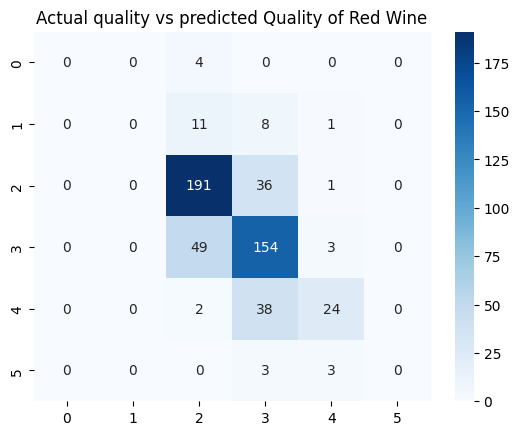

In [36]:
fig=sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Actual quality vs predicted Quality of Red Wine')
plt.show(fig)

In [44]:
#using AdaBoostClassifier with RandomForestClassifier as estimator in wine dataset
x=wine_df[wine_df.Type=="White wine"].drop(columns=['quality','Type'],axis=1)
y=wine_df[wine_df.Type=="White wine"]["quality"]
rfc=RandomForestClassifier()
abc =AdaBoostClassifier(n_estimators=50,estimator=rfc,learning_rate=1, random_state=0)

In [45]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.33)
abc.fit(x_train,y_train)

,estimator,RandomForestClassifier()
,n_estimators,50
,learning_rate,1
,algorithm,'deprecated'
,random_state,0
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [46]:
y_predicted=abc.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[  0,   0,   3,   0,   0,   0,   0],
       [  0,   9,  30,  17,   0,   0,   0],
       [  0,   4, 326, 151,   7,   1,   0],
       [  0,   1, 103, 575,  49,   0,   0],
       [  0,   0,   8, 123, 157,   2,   0],
       [  0,   0,   0,  17,  16,  17,   0],
       [  0,   0,   0,   1,   0,   0,   0]])

In [47]:
abc.score(x_test,y_test)

0.6703772418058133

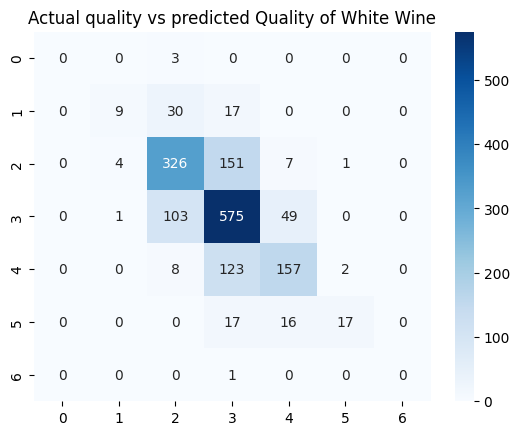

In [49]:
fig=sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Actual quality vs predicted Quality of White Wine')
plt.show(fig)